In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.read_csv('bio.csv')

df = df[["Age", "Gender", "BMI", "Body weight ", "Height ", "Fasting GLU - PDL (Lab)", "Insulin "]]

In [92]:
df.head()

,Age,Gender,BMI,Body weight,Height,Fasting GLU - PDL (Lab),Insulin
0,27,M,22.265239,133.8,65.0,91,2.5
1,49,F,30.946742,169.2,62.0,93,14.8
2,59,F,26.948690,157.0,64.0,118,17.4
3,33,F,42.384279,262.6,66.0,105,19.4
4,51,F,30.957534,172.0,62.5,144,12.9


In [93]:
df["HOMA-IR"] = (df["Fasting GLU - PDL (Lab)"]*df["Insulin "]) / (405)
df = df.drop(columns=["Fasting GLU - PDL (Lab)", "Insulin "])
df.columns

Index(['Age', 'Gender', 'BMI', 'Body weight ', 'Height ', 'HOMA-IR'], dtype='object')

In [94]:
df

,Age,Gender,BMI,Body weight,Height,HOMA-IR
0,27,M,22.265239,133.8,65.00,0.561728
1,49,F,30.946742,169.2,62.00,3.398519
2,59,F,26.948690,157.0,64.00,5.069630
3,33,F,42.384279,262.6,66.00,5.029630
4,51,F,30.957534,172.0,62.50,4.586667
5,51,F,29.303451,197.0,68.75,1.517037
6,66,F,27.070327,199.6,72.00,4.240000
7,54,M,39.945440,218.4,62.00,4.894815
8,34,F,37.001506,183.2,59.00,7.741728
9,54,F,35.811892,195.8,62.00,3.777778


In [95]:
gender_map = {
    "M": 1,
    "F": 0
}
df["Gender"] = df['Gender'].map(gender_map)


In [96]:
df.describe()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,48.111111,0.355556,31.149765,182.502222,64.376667,4.373460
std,12.703296,0.484090,6.728244,35.990090,3.277742,3.020246
min,18.000000,0.000000,20.689962,116.800000,59.000000,0.561728
25%,40.000000,0.000000,26.922934,157.000000,62.000000,2.250370
50%,51.000000,0.000000,30.038349,180.000000,64.000000,4.240000
75%,58.000000,1.000000,35.918461,202.000000,67.000000,5.083210
max,69.000000,1.000000,49.088236,284.600000,72.000000,16.956049


In [86]:
scaler = StandardScaler()
df[["Age", "BMI", "Body weight ", "Height ", "HOMA-IR"]] = scaler.fit_transform(df[["Age", "BMI", "Body weight ", "Height ", "HOMA-IR"]])
df.describe()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
count,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,-2.861908e-16,0.355556,-8.955799e-16,-7.956598e-17,4.835638e-16,-1.233581e-16
std,1.011300e+00,0.484090,1.011300e+00,1.011300e+00,1.011300e+00,1.011300e+00
min,-2.397123e+00,0.000000,-1.572178e+00,-1.846193e+00,-1.658893e+00,-1.276321e+00
25%,-6.457194e-01,0.000000,-6.353208e-01,-7.165970e-01,-7.332861e-01,-7.108957e-01
50%,2.299823e-01,0.000000,-1.670533e-01,-7.031093e-02,-1.162151e-01,-4.468762e-02
75%,7.872470e-01,1.000000,7.167667e-01,5.478758e-01,8.093915e-01,2.376530e-01
max,1.662949e+00,1.000000,2.696271e+00,2.868886e+00,2.352069e+00,4.213157e+00


In [97]:
df.to_csv("stuff raw.csv", index=False)

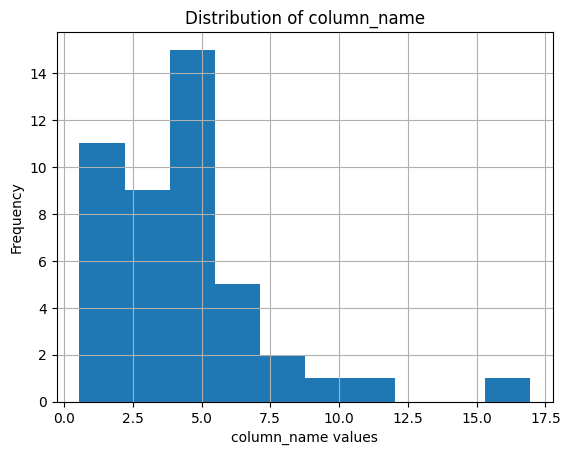

In [98]:
import matplotlib.pyplot as plt
df['HOMA-IR'].hist()

# Add title and labels (optional)
plt.title('Distribution of column_name')
plt.xlabel('column_name values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [99]:
import seaborn as sns
df.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None)

,Age,Gender,BMI,Body weight,Height,HOMA-IR
Age,1.000000,-0.132226,0.001036,-0.092696,-0.167205,0.079607
Gender,-0.132226,1.000000,-0.192220,0.018738,0.453670,-0.160827
BMI,0.001036,-0.192220,1.000000,0.883373,-0.397177,0.472002
Body weight,-0.092696,0.018738,0.883373,1.000000,0.071888,0.285412
Height,-0.167205,0.453670,-0.397177,0.071888,1.000000,-0.463972
HOMA-IR,0.079607,-0.160827,0.472002,0.285412,-0.463972,1.000000
